In [1]:
import os

os.chdir(os.path.dirname(os.getcwd()))

In [2]:
import libs.local
import matplotlib.pyplot
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import xarray

In [3]:
experiment = 'ssp585'
key = 'Ensemble mean'
seasons = ['DJF', 'MAM', 'JJA', 'SON']
region = 'Central'
si_var = 'sisnthick'

kwargs = {
    'experiment': experiment,
    'region': region,
    'suffix': '_delta_1980-2010'
}
si_data = libs.local.get_ensemble_series(si_var, **kwargs)[key]
tas = libs.local.get_ensemble_series('tas', **kwargs)[key]
evspsbl = libs.local.get_ensemble_series('evspsbl', **kwargs)[key]
pr = libs.local.get_ensemble_series('pr', **kwargs)[key]
prra = libs.local.get_ensemble_series('prra', **kwargs)[key]
prsn = libs.local.get_ensemble_series('prsn', **kwargs)[key]


def filter_season_plot(period, siconc, tas, pr, prra, prsn, title=''):
    siconc = siconc.where(siconc.time['time.season'] == period)
    tas = tas.where(tas.time['time.season'] == period)
    pr = pr.where(pr.time['time.season'] == period)
    prra = prra.where(prra.time['time.season'] == period)
    prsn = prsn.where(prsn.time['time.season'] == period)
    
    plot(siconc, tas, pr, prra, prsn, title)

    
def plot(siconc, tas, pr, prra, prsn, title=''):
    fig, axs = matplotlib.pyplot.subplots(2, 5, figsize=(12,6))
    axs = axs.flatten()
    axs[0].scatter(siconc, tas); axs[0].set_xlabel(si_var); axs[0].set_ylabel('tas')
    axs[1].scatter(siconc, prsn); axs[1].set_xlabel(si_var); axs[1].set_ylabel('prsn')
    axs[2].scatter(siconc, prra); axs[2].set_xlabel(si_var); axs[2].set_ylabel('prra')
    axs[3].scatter(siconc, pr); axs[3].set_xlabel(si_var); axs[3].set_ylabel('pr')
    axs[4].scatter(siconc, evspsbl); axs[4].set_xlabel(si_var); axs[4].set_ylabel('evspsbl')

    axs[6].scatter(tas, prsn); axs[6].set_xlabel('tas'); axs[6].set_ylabel('prsn')
    axs[7].scatter(tas, prra); axs[7].set_xlabel('tas'); axs[7].set_ylabel('prra')
    axs[8].scatter(tas, pr); axs[8].set_xlabel('tas'); axs[8].set_ylabel('pr')
    axs[9].scatter(tas, evspsbl); axs[9].set_xlabel('tas'); axs[9].set_ylabel('evspsbl')

    fig.suptitle(title)
    fig.tight_layout()


'''tas_abs = libs.local.get_ensemble_series('tas', **kwargs)[key]
mask = tas_abs > 0
siconc = siconc.where(mask)
tas = tas.where(mask)
pr = pr.where(mask)
prra = prra.where(mask)
prsn = prsn.where(mask)''';

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sisnthick   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     1033.
Date:                Mon, 30 May 2022   Prob (F-statistic):          1.59e-279
Time:                        09:12:10   Log-Likelihood:                 2528.1
No. Observations:                1452   AIC:                            -5050.
Df Residuals:                    1449   BIC:                            -5034.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0192      0.002    -12.420      0.000      -0.022      -0.016
tas           -0.0064      0.000    -43.813      0.000      -0.007      -0.006
prra           0.0131      0.003      3.847      0.000       0.006       0.020
==============================================================================
Omnibus:                      546.890   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1813.553
Skew:                          -1.897   Prob(JB):                         0.00
Kurtosis:                       6.948   Cond. No.                         33.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

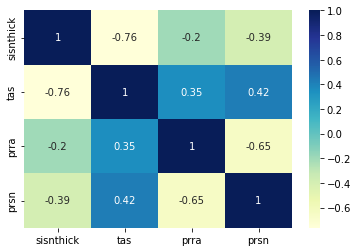

In [4]:
data = pd.DataFrame({
    (si_var): si_data.data,
    'tas': tas.data,
    'prra': prra.data,
    'prsn': prsn.data
})
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)

model = smf.ols(formula=f'{si_var} ~ tas + prra', data=data).fit()
model.summary()

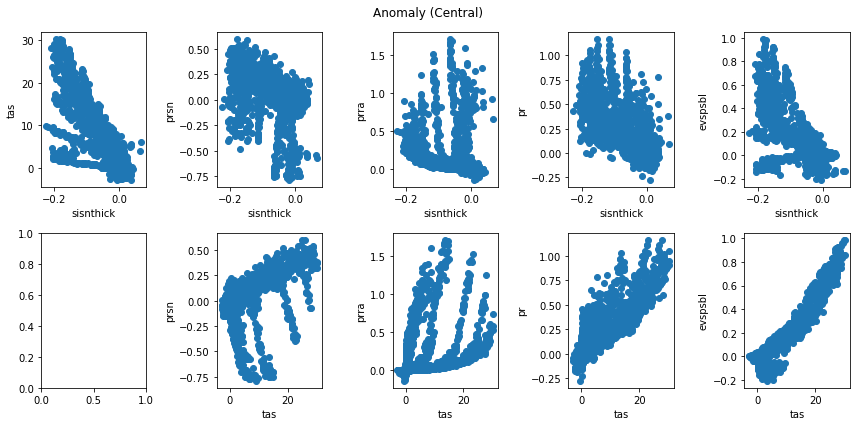

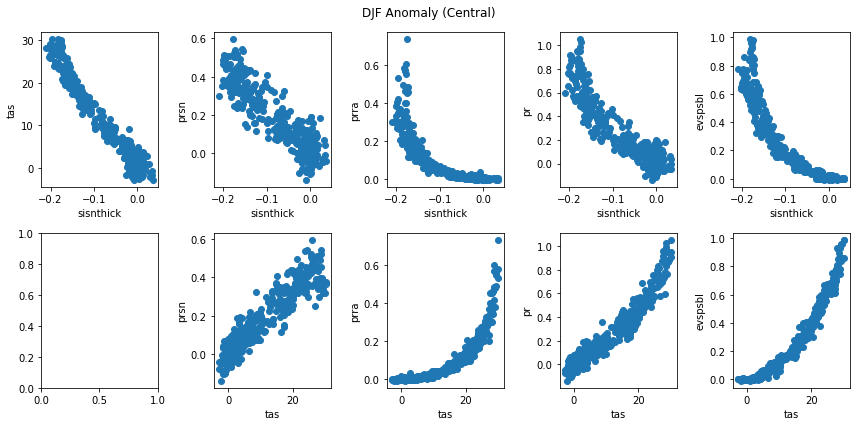

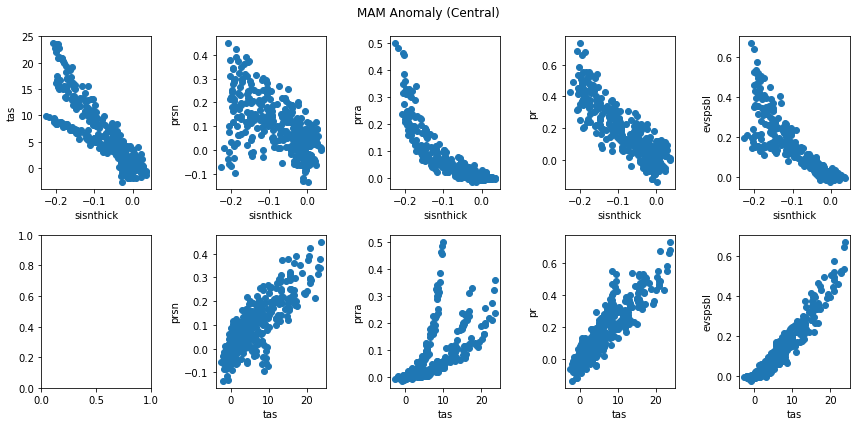

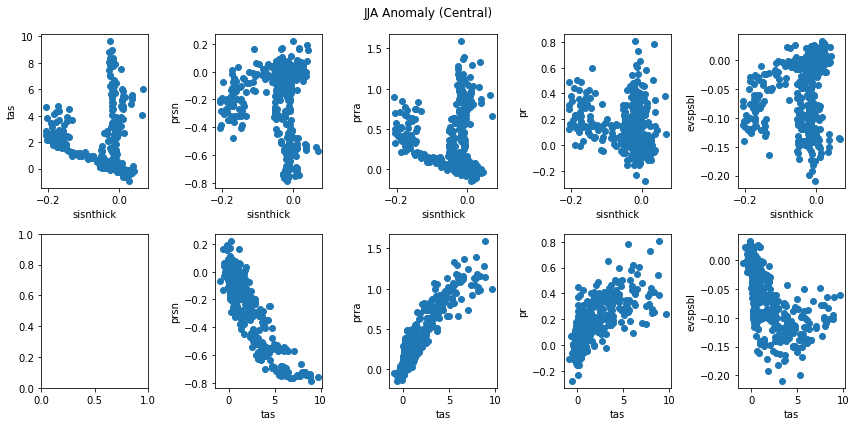

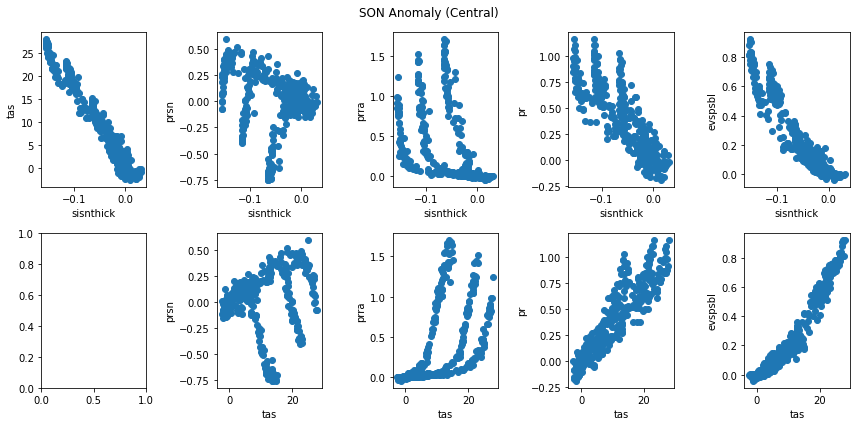

In [5]:
plot(si_data, tas, pr, prra, prsn, title=f'Anomaly ({region})')

[filter_season_plot(s, si_data, tas, pr, prra, prsn, title=f'{s} Anomaly ({region})') for s in seasons];

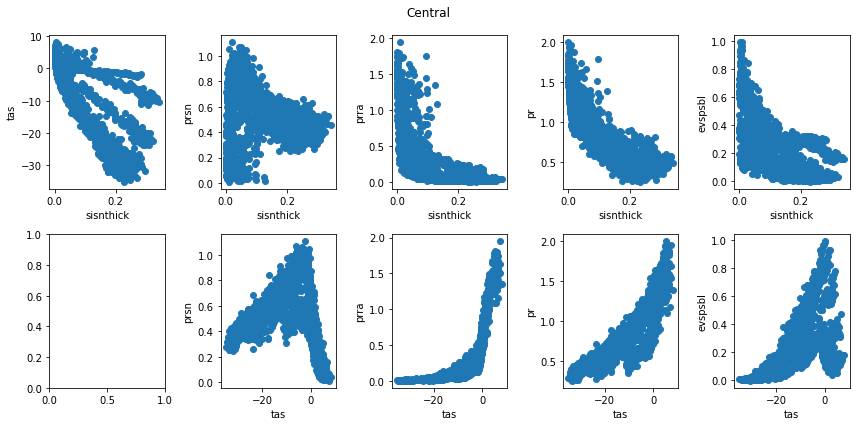

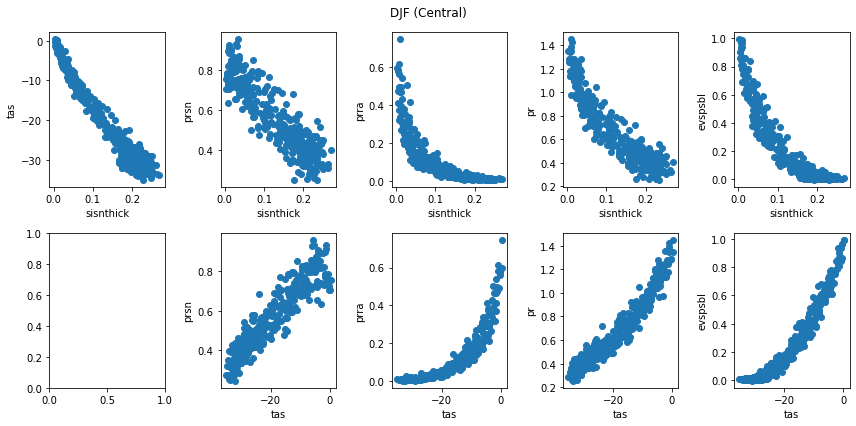

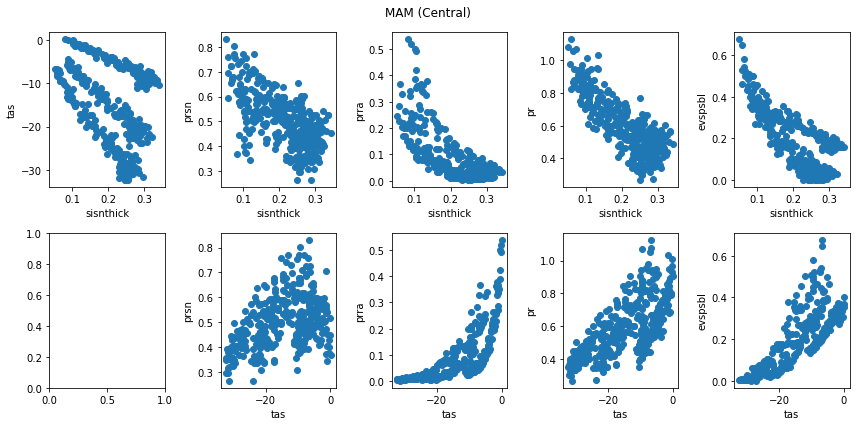

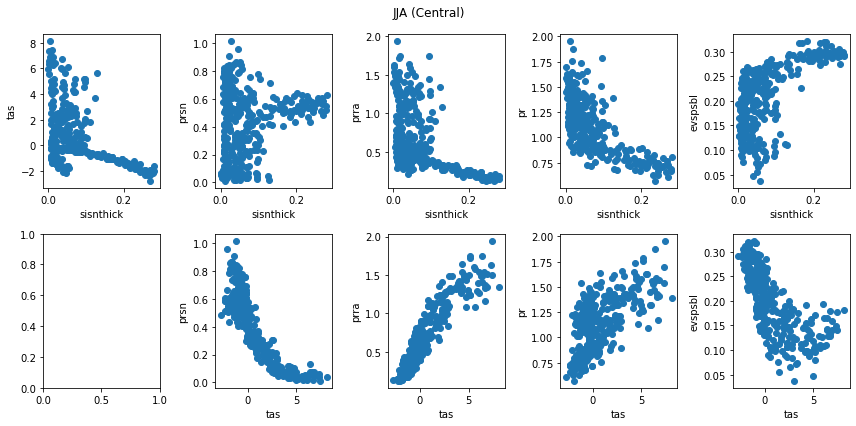

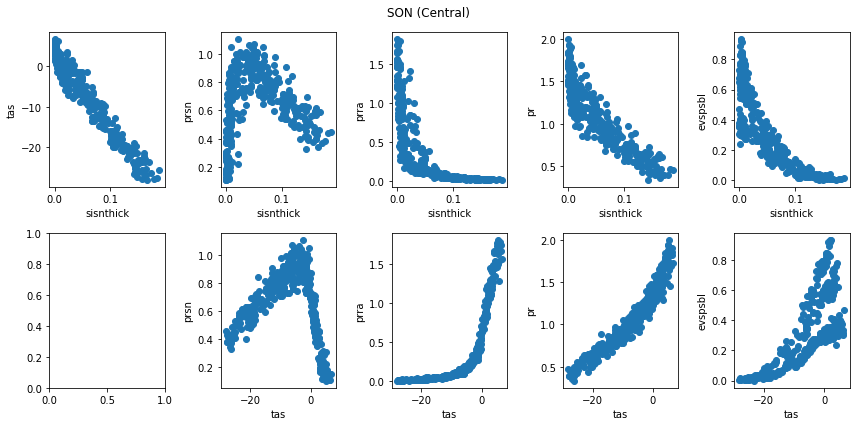

In [6]:
kwargs = {
    'experiment': experiment,
    'region': region,
    'suffix': ''
}
si_data = libs.local.get_ensemble_series(si_var, **kwargs)[key]
tas = libs.local.get_ensemble_series('tas', **kwargs)[key]
evspsbl = libs.local.get_ensemble_series('evspsbl', **kwargs)[key]
pr = libs.local.get_ensemble_series('pr', **kwargs)[key]
prra = libs.local.get_ensemble_series('prra', **kwargs)[key]
prsn = libs.local.get_ensemble_series('prsn', **kwargs)[key]

plot(si_data, tas, pr, prra, prsn, title=region)

[filter_season_plot(s, si_data, tas, pr, prra, prsn, title=f'{s} ({region})') for s in seasons];

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sisnthick   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     688.4
Date:                Mon, 30 May 2022   Prob (F-statistic):          6.97e-211
Time:                        09:12:22   Log-Likelihood:                 1881.0
No. Observations:                1452   AIC:                            -3756.
Df Residuals:                    1449   BIC:                            -3740.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1029      0.004     23.637      0.000       0.094       0.111
tas           -0.0035      0.000    -15.882      0.000      -0.004      -0.003
prra          -0.0700      0.006    -11.470      0.000      -0.082      -0.058
==============================================================================
Omnibus:                      173.013   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.043
Skew:                           0.979   Prob(JB):                     3.36e-52
Kurtosis:                       3.288   Cond. No.                         64.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

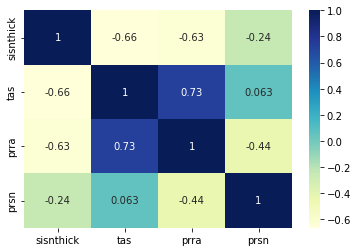

In [7]:
data = pd.DataFrame({
    (si_var): si_data.data,
    'tas': tas.data,
    'prra': prra.data,
    'prsn': prsn.data
})

sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)

model = smf.ols(formula=f'{si_var} ~ tas + prra', data=data).fit()
model.summary()

In [8]:
model = smf.ols(formula=f'{si_var} ~ tas + prra + prsn', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sisnthick   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1348.
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        09:12:22   Log-Likelihood:                 2364.0
No. Observations:                1452   AIC:                            -4720.
Df Residuals:                    1448   BIC:                            -4699.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3675      0.008     47.084      0.000       0.352       0.383
tas            0.0011      0.000      5.374      0.000       0.001       0.001
prra          -0.2307      0.006    -37.407      0.000      -0.243      -0.219
prsn          -0.3063      0.008    -36.987      0.000      -0.323      -0.290
==============================================================================
Omnibus:                       35.230   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.185
Skew:                           0.384   Prob(JB):                     8.42e-09
Kurtosis:                       2.845   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""